In [2]:
# General
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#System
import pickle
from glob import glob
from os.path import join
from datetime import datetime


#Prop
from PSPupil import Preprocessing as PS
from PSPupil import dataset as dt
from decim.adjuvant import slurm_submit as slu


#Special
from specparam import SpectralModel
from specparam.utils.download import load_example_data
from specparam.utils.reports import methods_report_info, methods_report_text
from specparam.plts import model

In [2]:
baseline_color = 'tab:red'
follow_color = baseline_color
ips_color = 'tab:purple'
control_color = 'tab:orange'


In [3]:
edition = '/Volumes/psp_data/PSP/Pupil_Preprocessed_2024-06-17/'
condition = 'bp_non_normalized' # preprocessing condition (bandpassfiltering? z-scoring?)

out_dir = join(edition, 'SPECPARAMS')
slu.mkdir_p(out_dir)

In [4]:
# load power spectra as saved for newer runs (all in one file)

# parameters used for FFT
freq = 60
segment = 60
overlap = segment/2

PowerSpectra = pd.read_hdf(join(edition, 'PowerFrequencies', 'PowerSpectra_{0}_{1}_pd.hdf'.format(segment, overlap)), key='data')
PowerSpectra = PowerSpectra.loc[PowerSpectra.condition == condition]

## FOOOF / SPECPARAMS

In [10]:
# constrain frequency spectrum
freq_range = [0.01, 1]
aperiodic_mode = 'fixed'
peak_width_limits = (0.05, 0.15)
min_peak_height = .6
max_n_peaks=3

('Control', 'Baseline', '02')
                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.1990, 0.7405                                          
                                                                                                  
                                       0 peaks were found:                     

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.7564, 1.3806                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.0340, 1.7931                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.0369, 0.7009                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.7749, 1.2793                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.9620, 1.3087                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.4034, 1.4584                                          
                                                                                                  
                                       3 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.6352, 1.1331                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.4452, 1.7839                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.5831, 1.6489                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.8644, 1.5891                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.4044, 1.4784                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.1373, 1.8333                                          
                                                                                                  
                                       3 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.2742, 0.8299                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.0391, 1.6393                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.4150, 1.5180                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.0826, 1.0398                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.0330, 1.4310                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.1327, 1.5981                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.9251, 1.9368                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.8676, 1.6080                                          
                                                                                                  
                                       2 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.1141, 1.7076                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.1339, 1.8785                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.7118, 1.7706                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.0243, 1.4955                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.9579, 1.3388                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.4419, 0.9317                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.4830, 1.1386                                          
                                                                                                  
                                       2 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.9003, 1.4590                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.0733, 1.1288                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.6259, 1.2262                                          
                                                                                                  
                                       3 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.0447, 1.4633                                          
                                                                                                  
                                       2 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.6640, 1.6519                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.4723, 1.1750                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.5570, 1.6026                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.5964, 1.6203                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.1318, 0.9931                                          
                                                                                                  
                                       2 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.6355, 1.4433                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.9711, 1.7085                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.5524, 1.1246                                          
                                                                                                  
                                       2 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.7452, 1.5040                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.5856, 1.3086                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.0211, 1.3673                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.2622, 1.4712                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.1704, 1.8336                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.7701, 1.0415                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.9900, 1.3529                                          
                                                                                                  
                                       3 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.0461, 1.2972                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.7806, 1.5998                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.9713, 1.6941                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.5669, 1.4712                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.3709, 1.2255                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.7725, 1.5845                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.9037, 1.6567                                          
                                                                                                  
                                       3 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.1932, 0.8761                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -2.1226, 2.0979                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.5189, 1.7680                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.9078, 1.4103                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -2.2450, 1.8190                                          
                                                                                                  
                                       2 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.5468, 1.7129                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.3577, 1.7228                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.5964, 1.3652                                          
                                                                                                  
                                       2 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.2080, 1.1570                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.0170, 1.6134                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.6616, 1.3670                                          
                                                                                                  
                                       0 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.7176, 1.3589                                          
                                                                                                  
                                       1 peaks were found:                                        
          

/Users/kenohagena/anaconda3/lib/python3.6/site-packages/specparam/plts/utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -1.5573, 1.3902                                          
                                                                                                  
                                       0 peaks were found:                                        
          

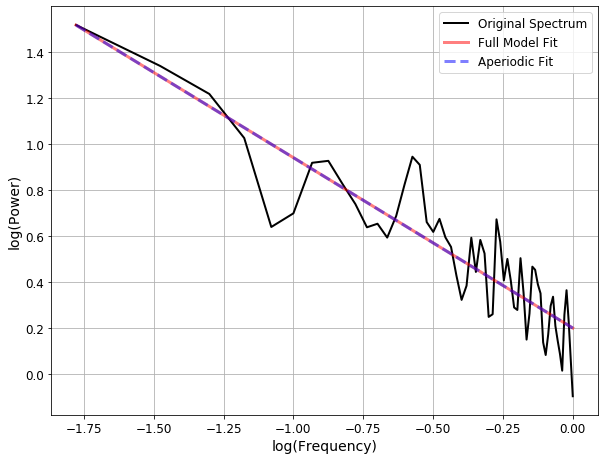

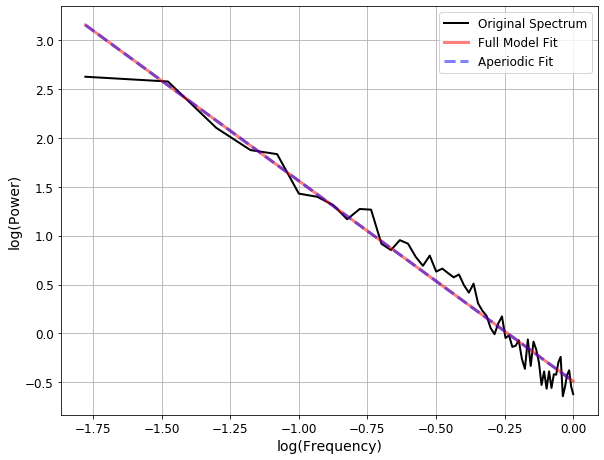

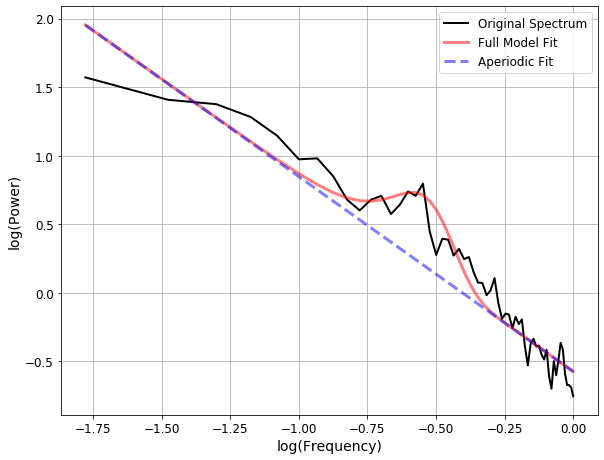

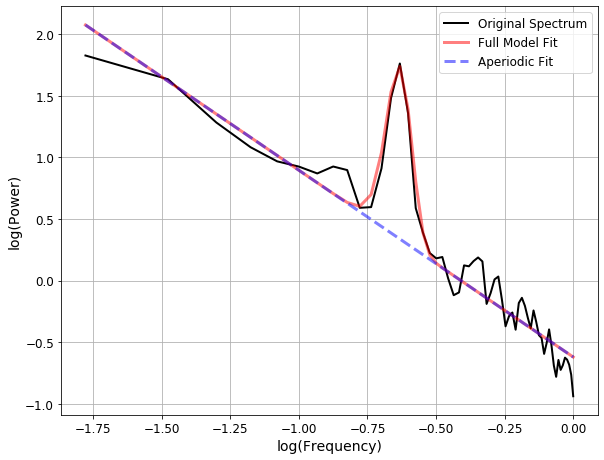

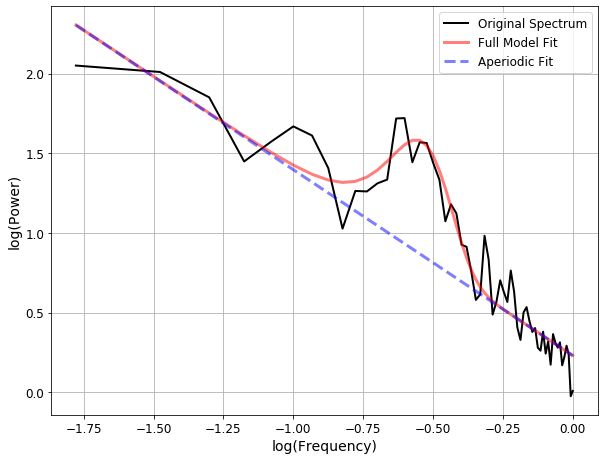

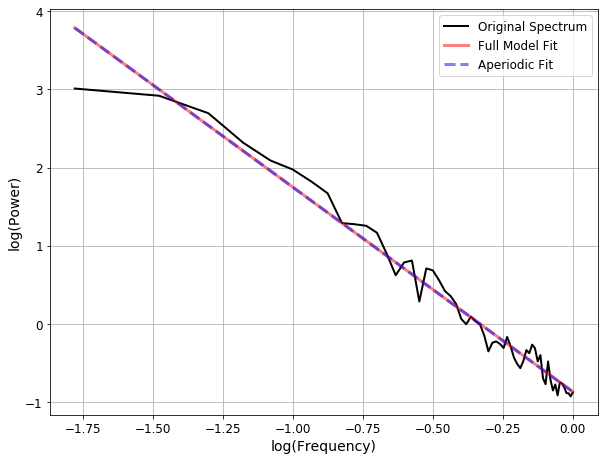

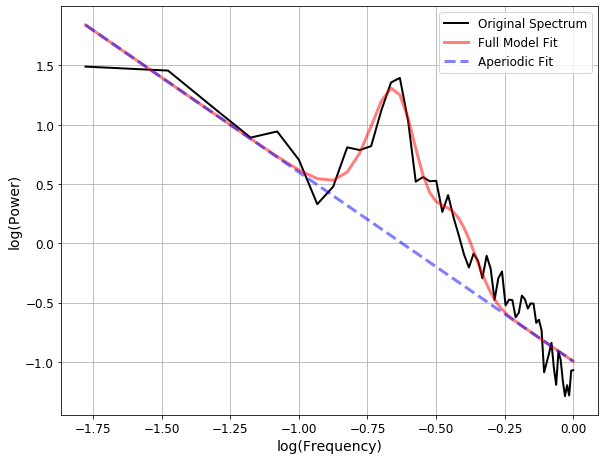

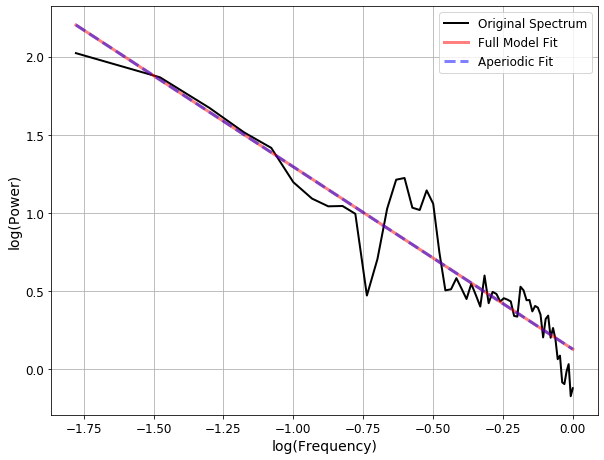

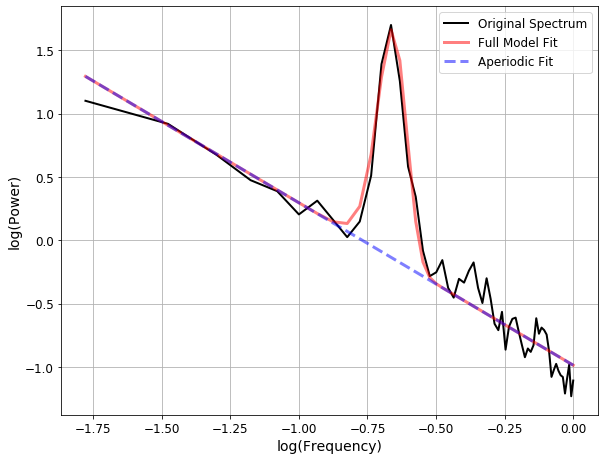

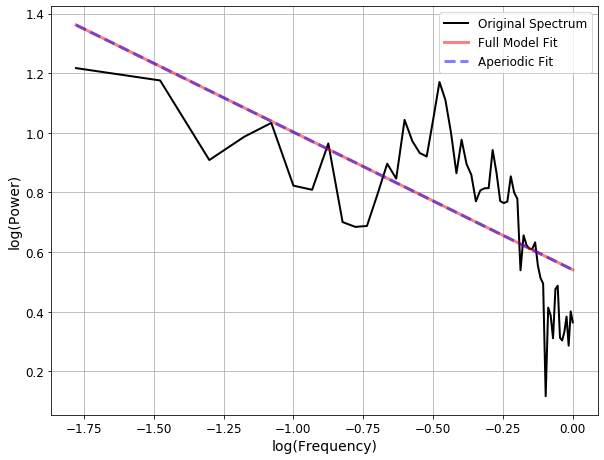

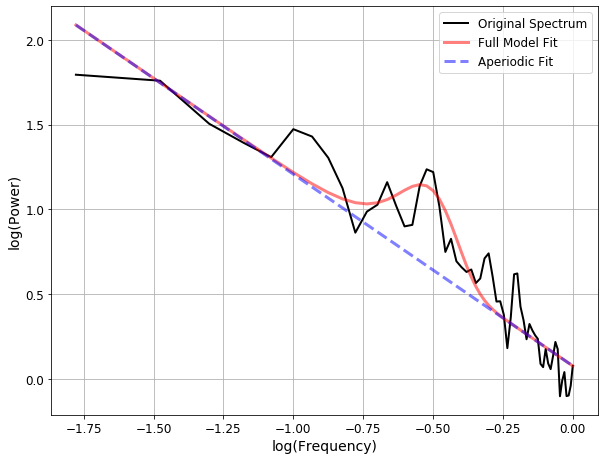

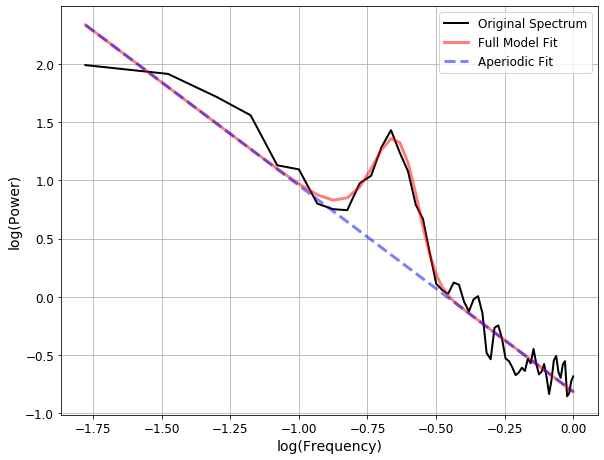

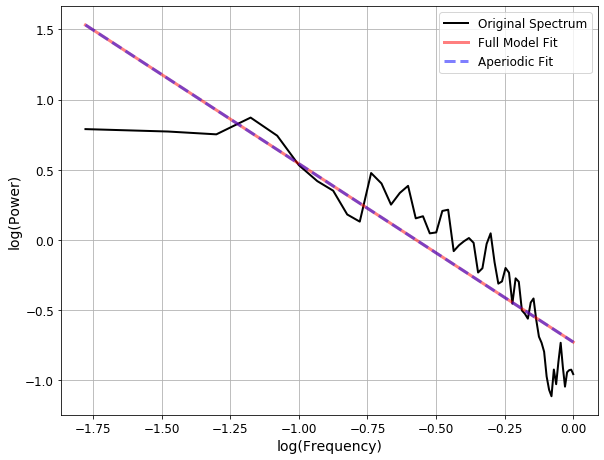

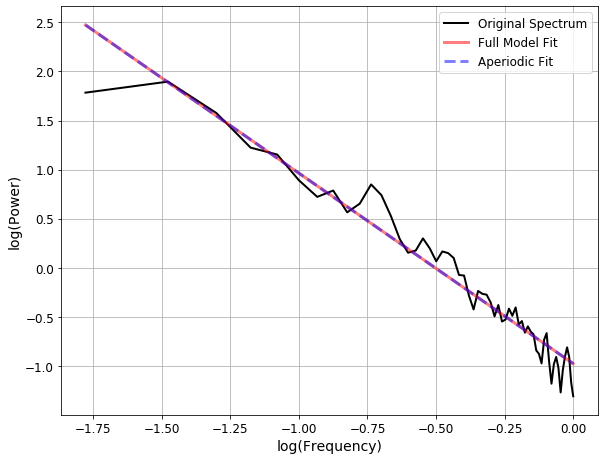

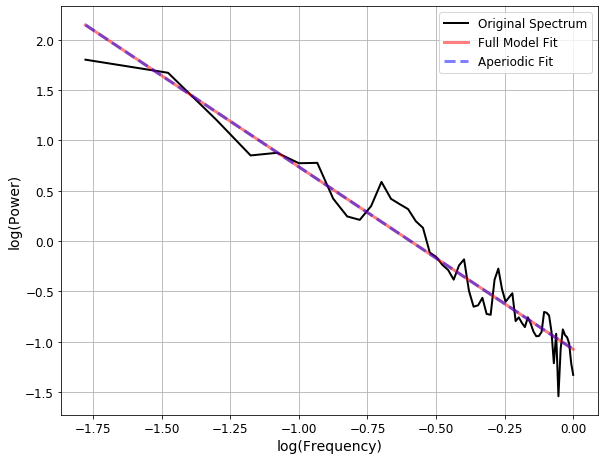

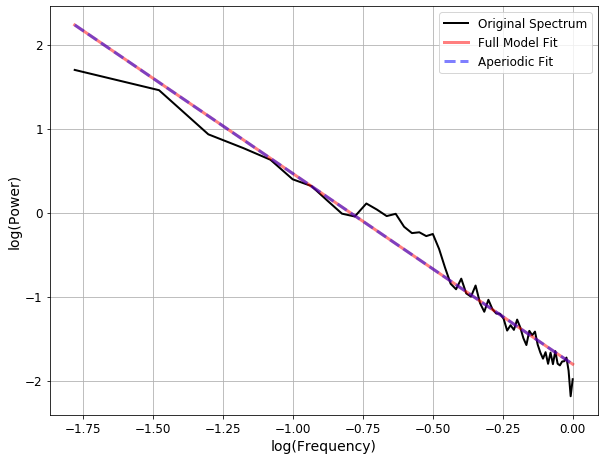

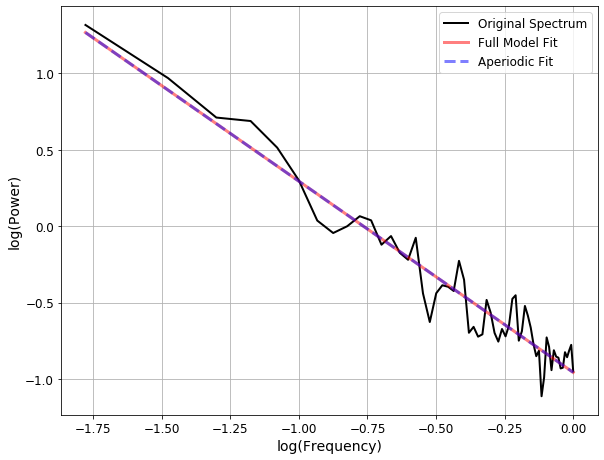

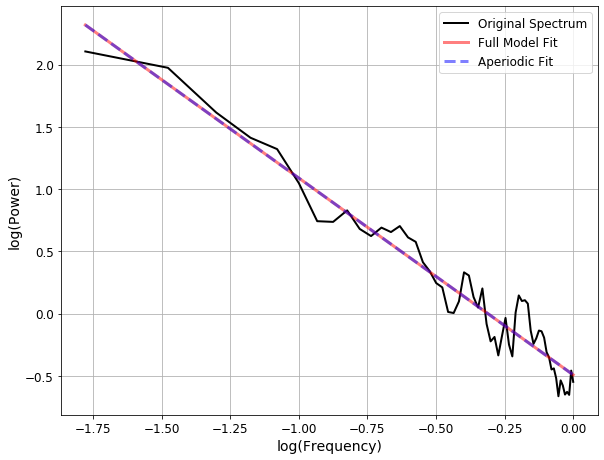

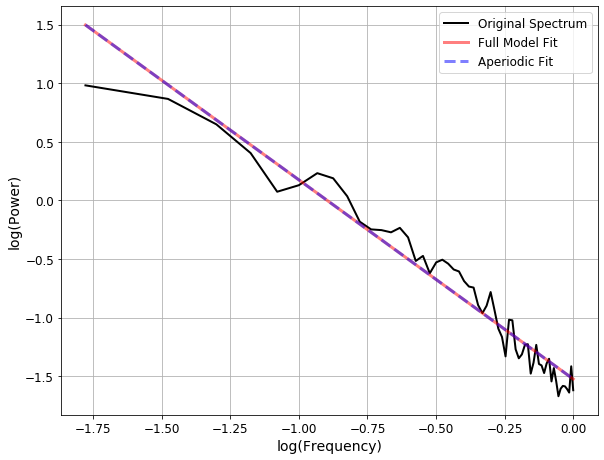

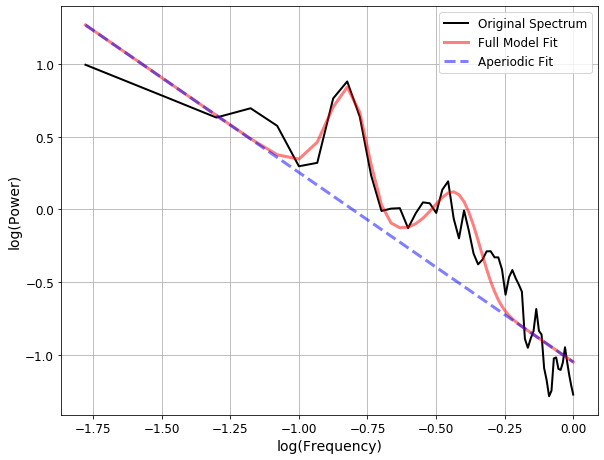

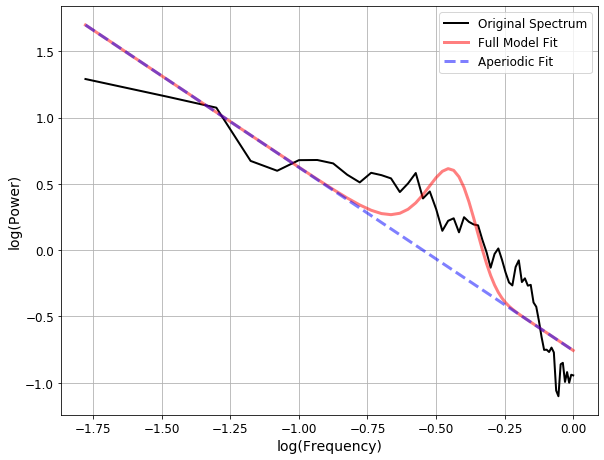

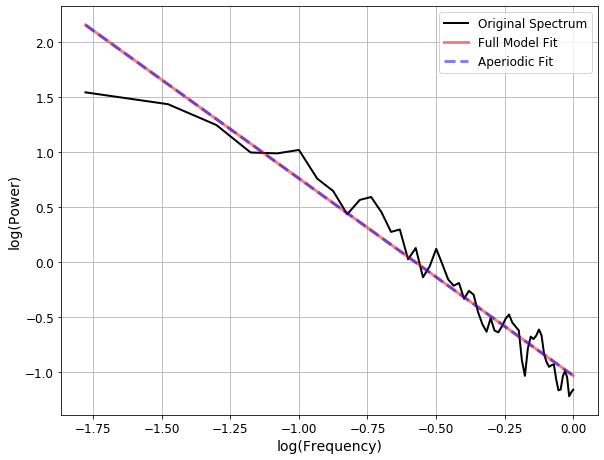

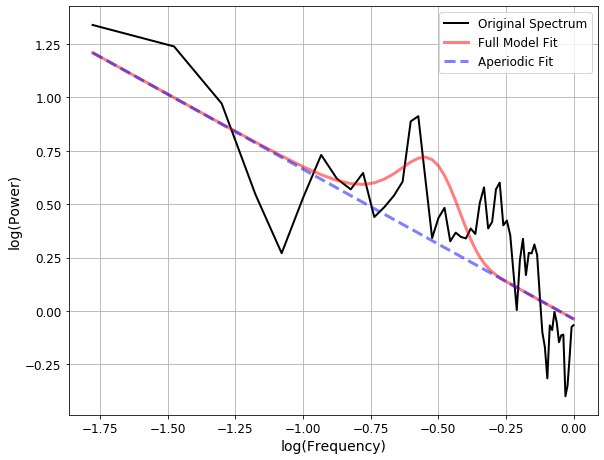

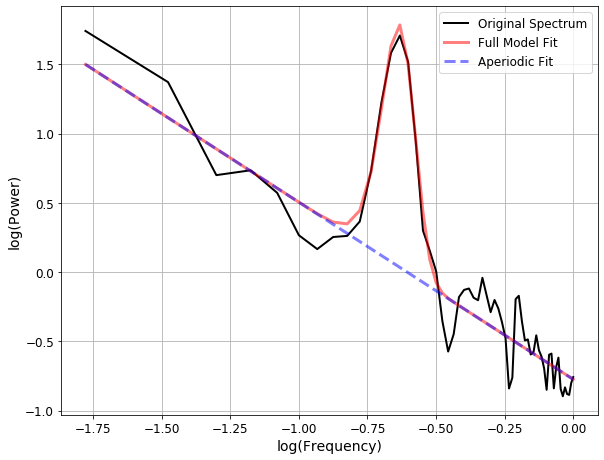

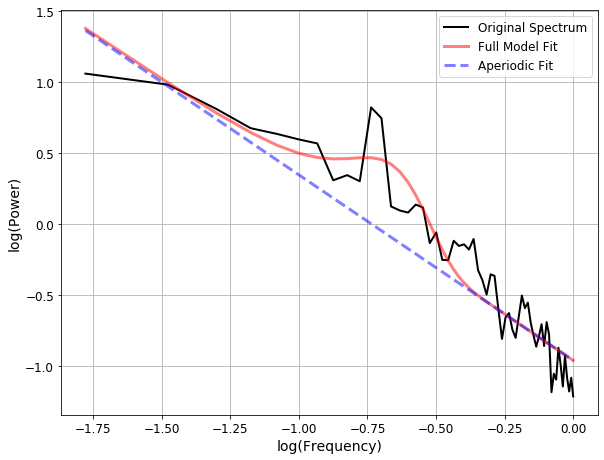

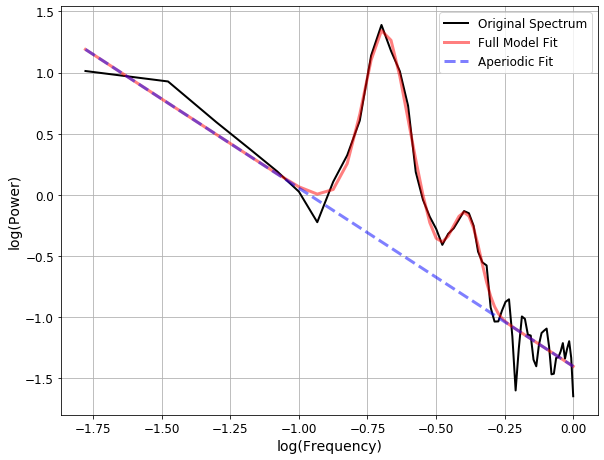

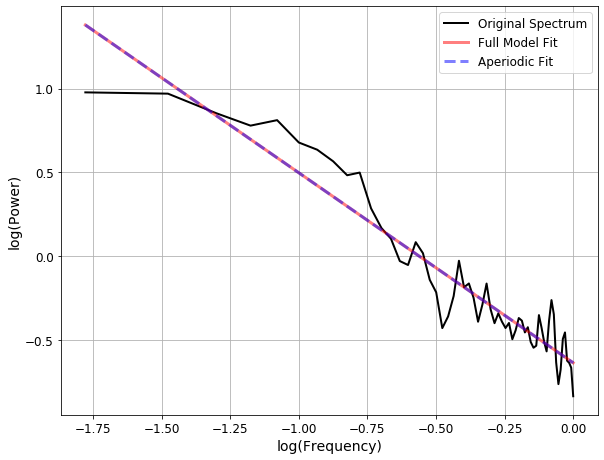

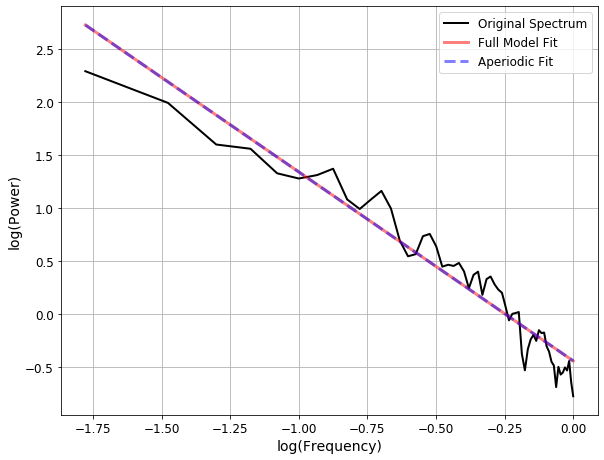

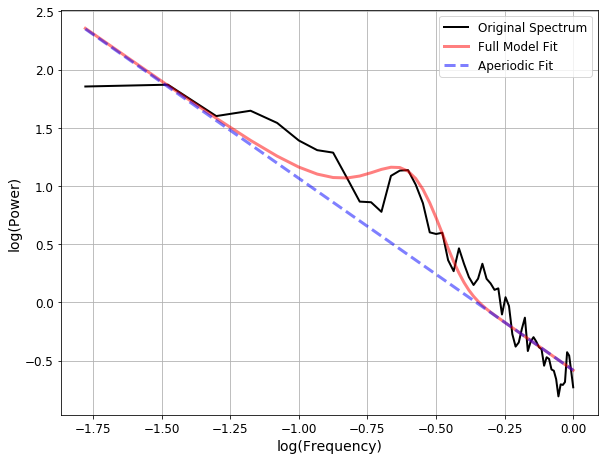

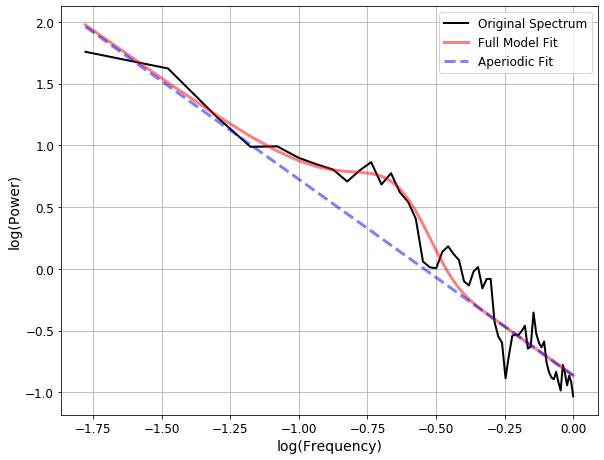

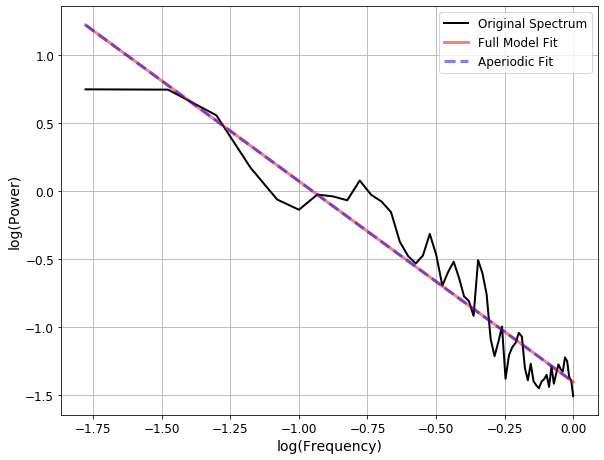

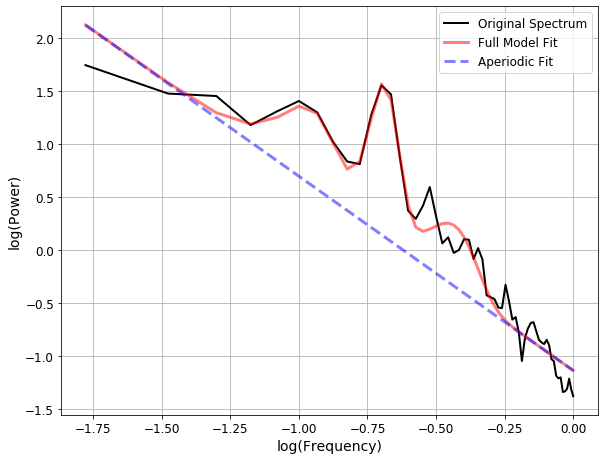

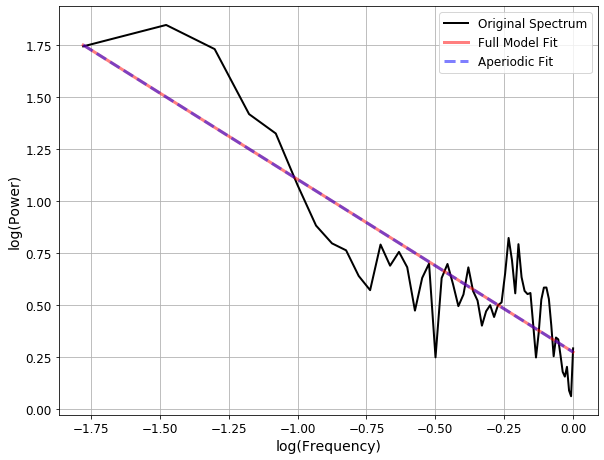

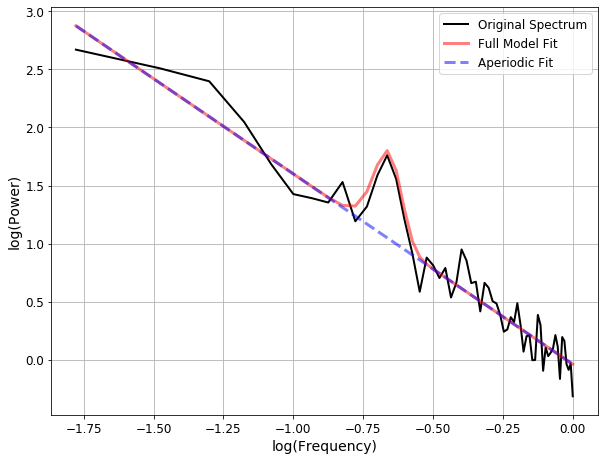

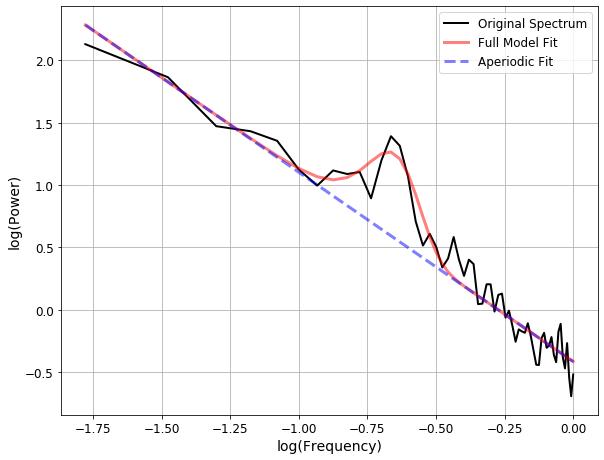

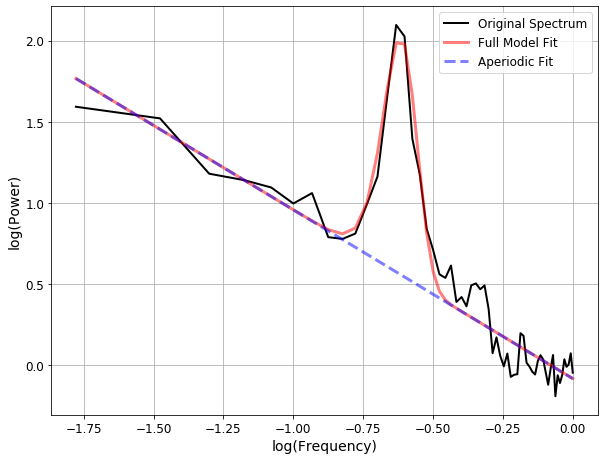

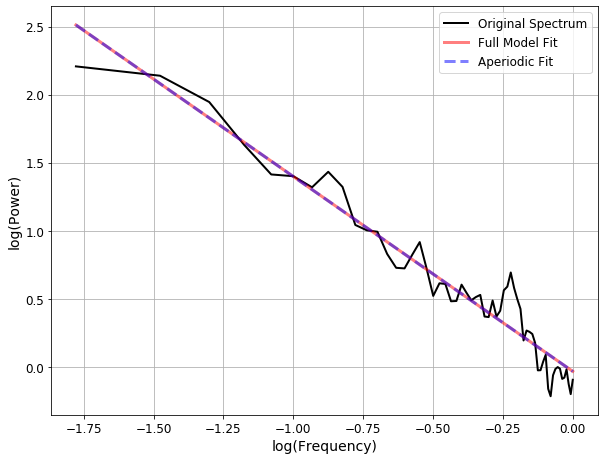

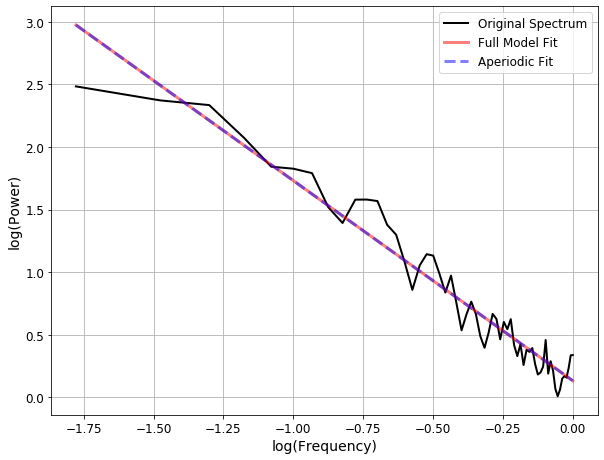

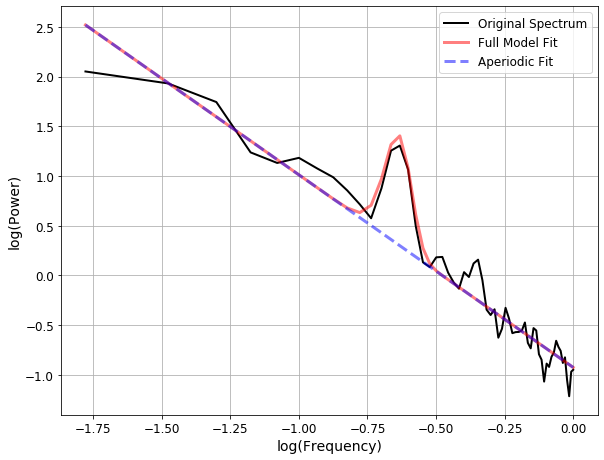

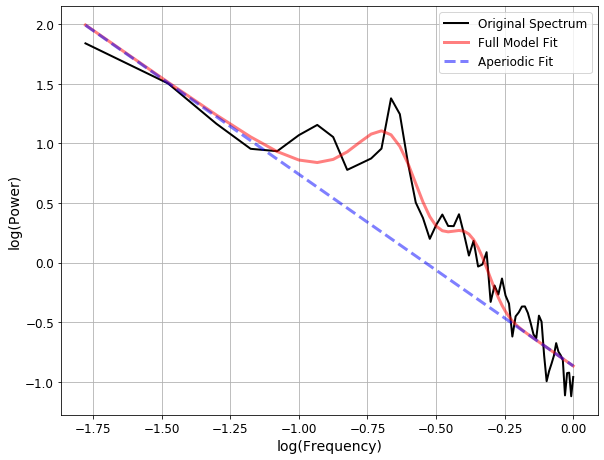

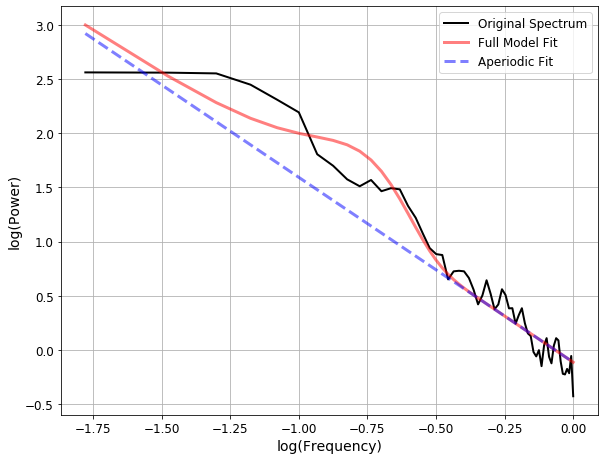

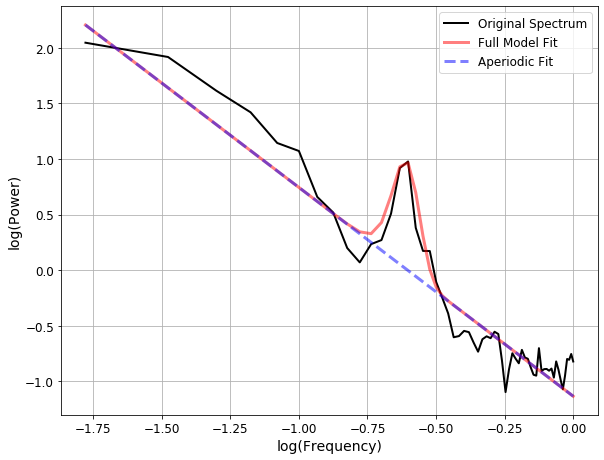

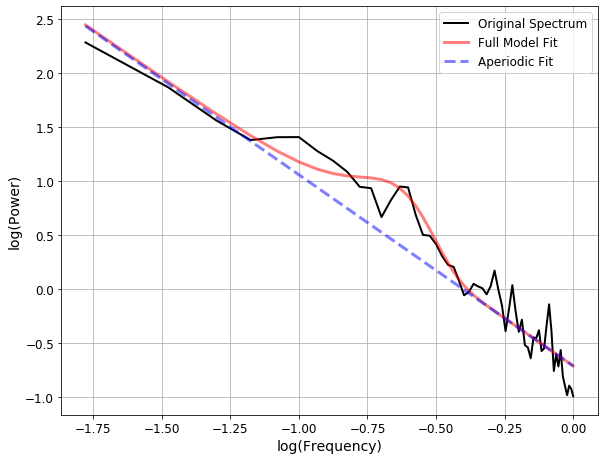

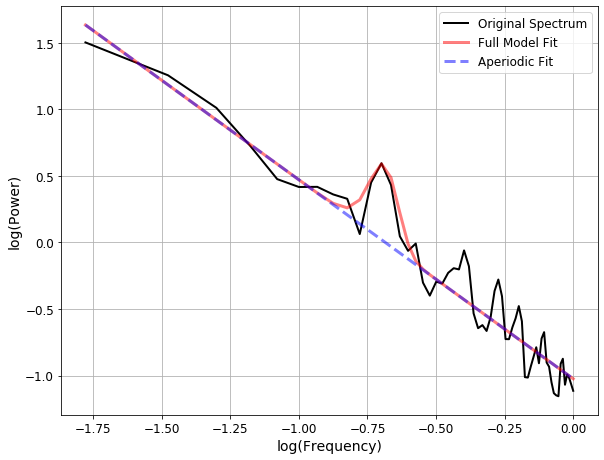

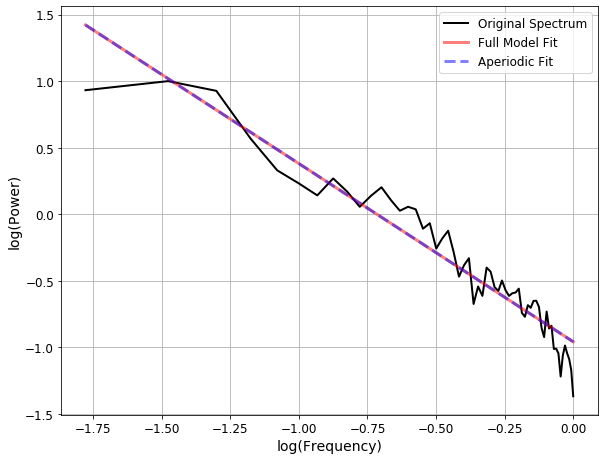

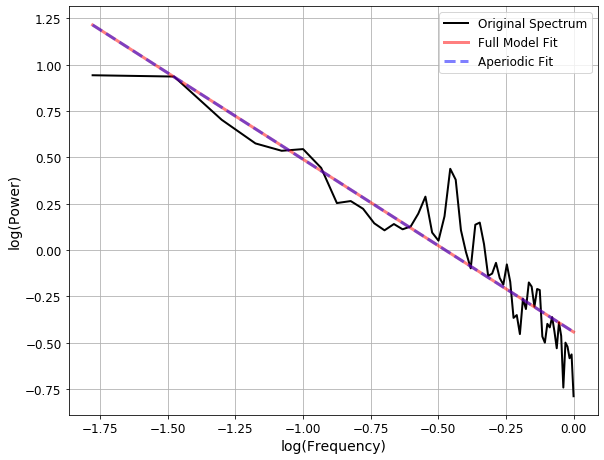

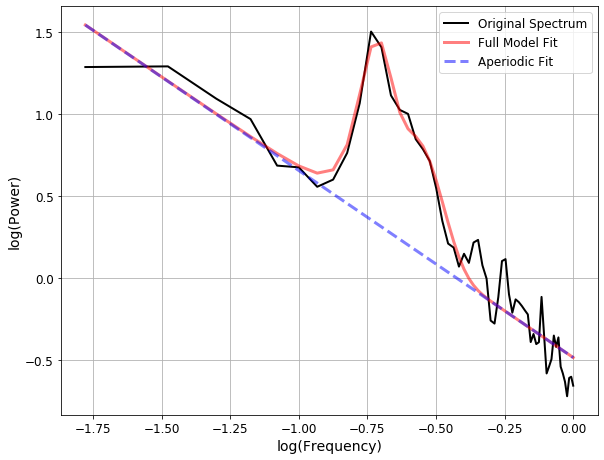

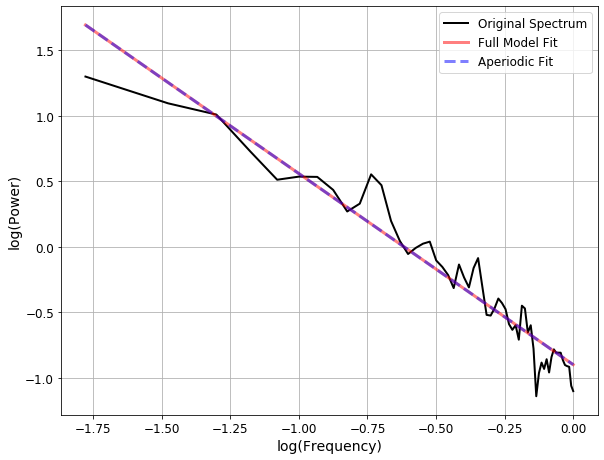

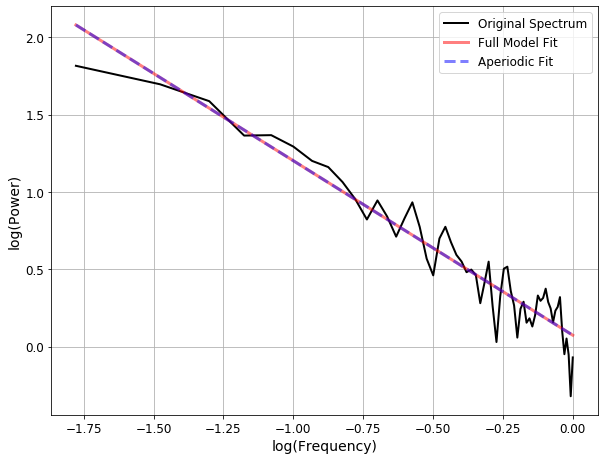

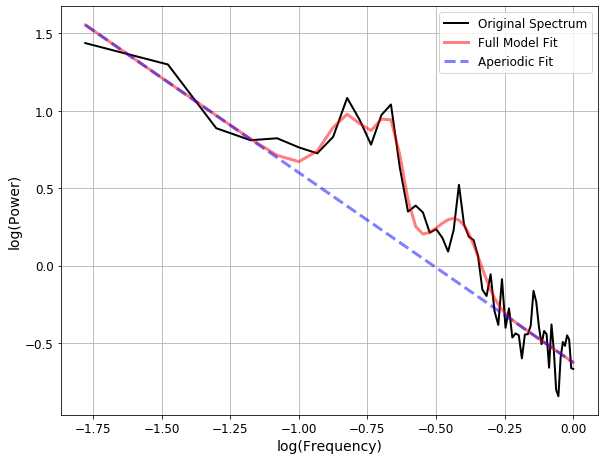

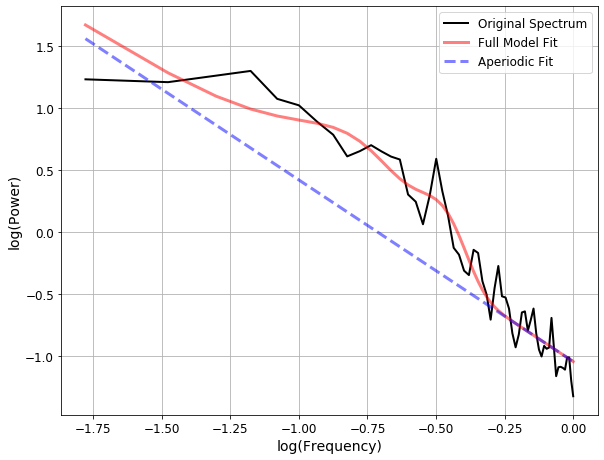

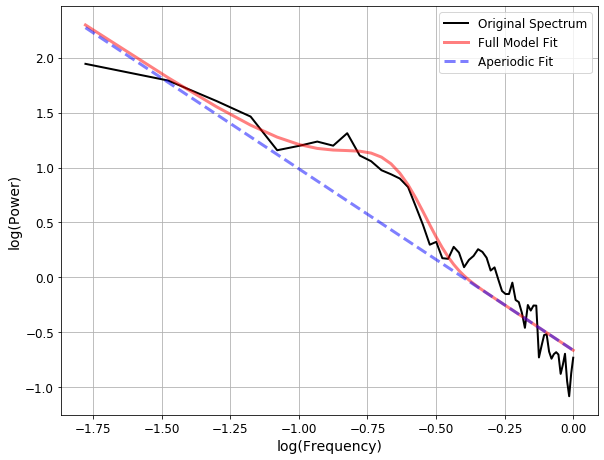

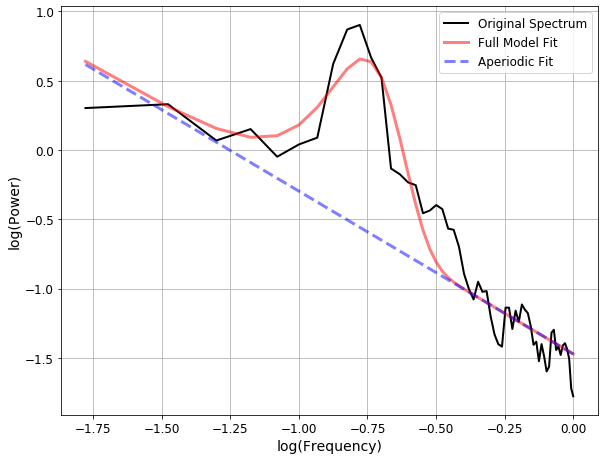

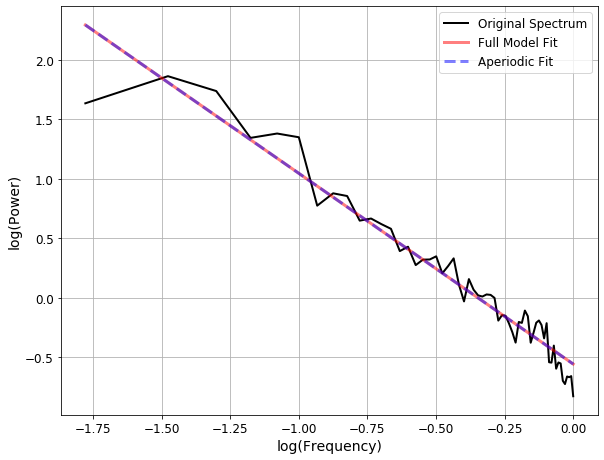

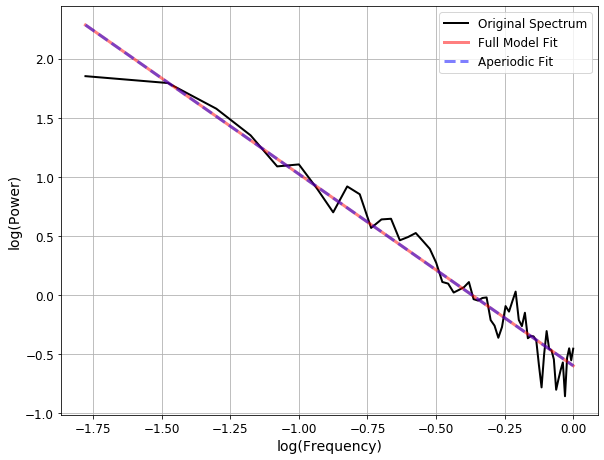

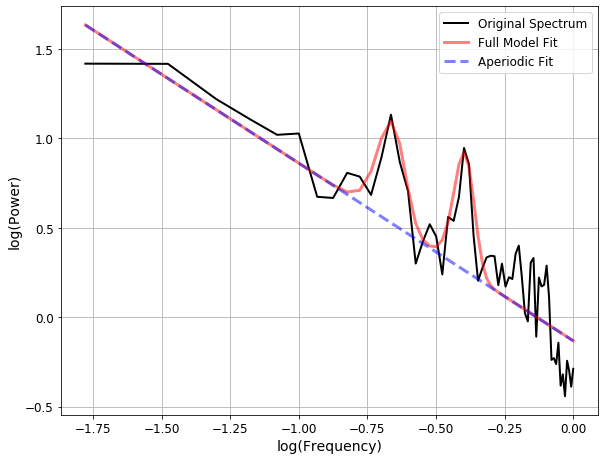

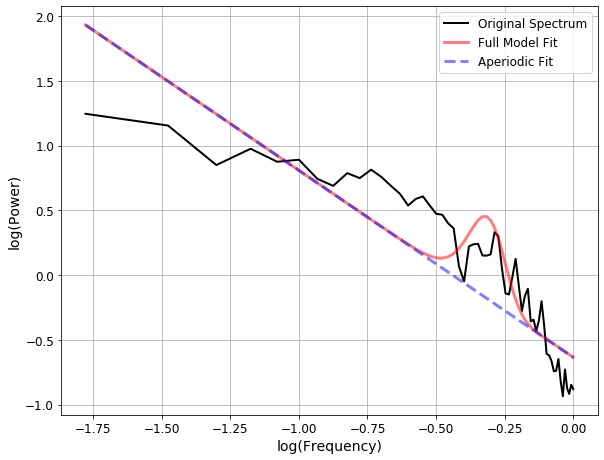

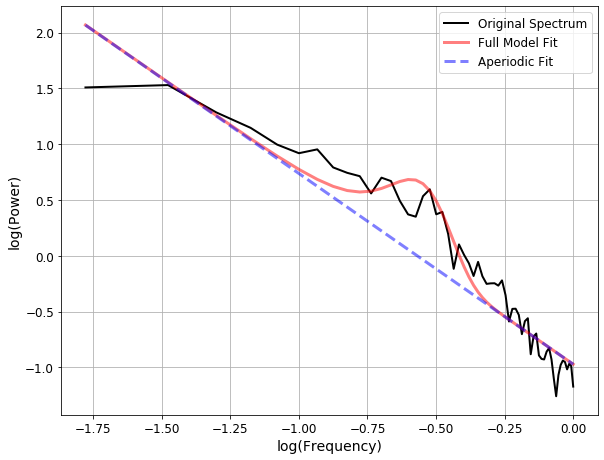

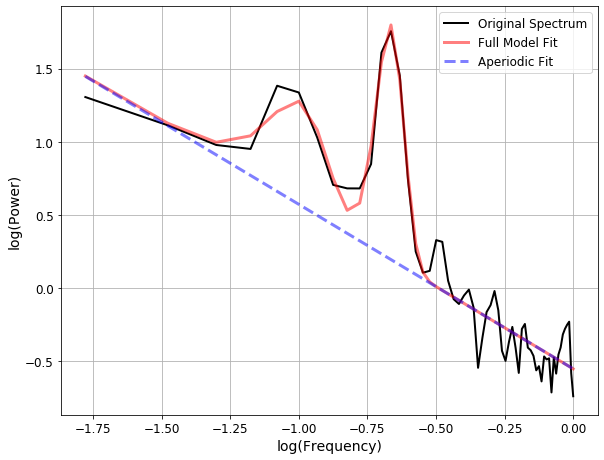

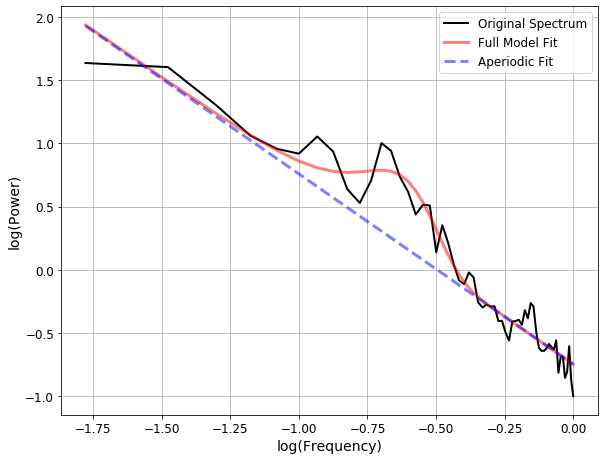

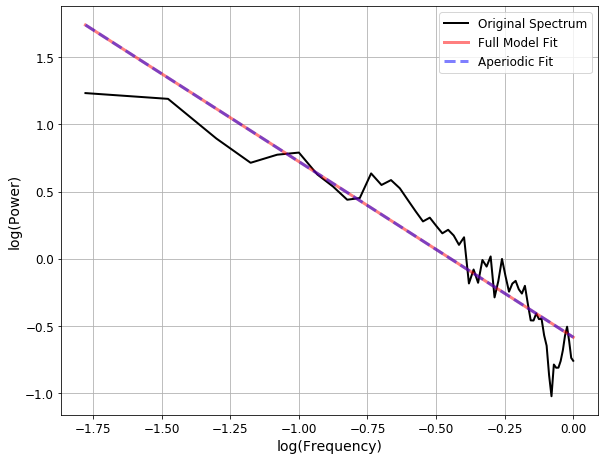

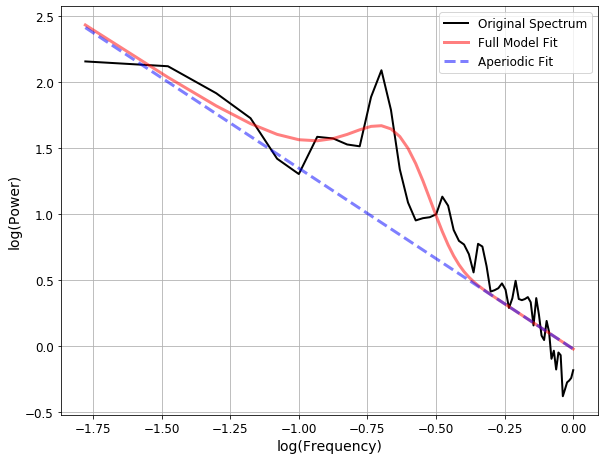

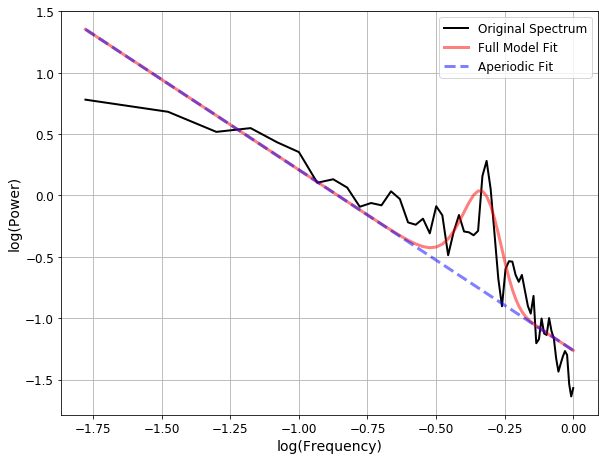

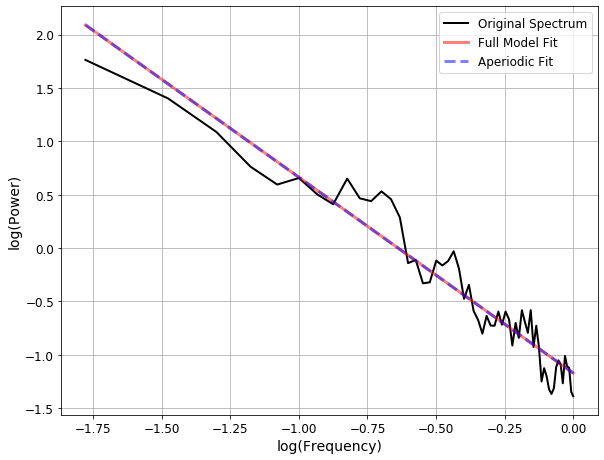

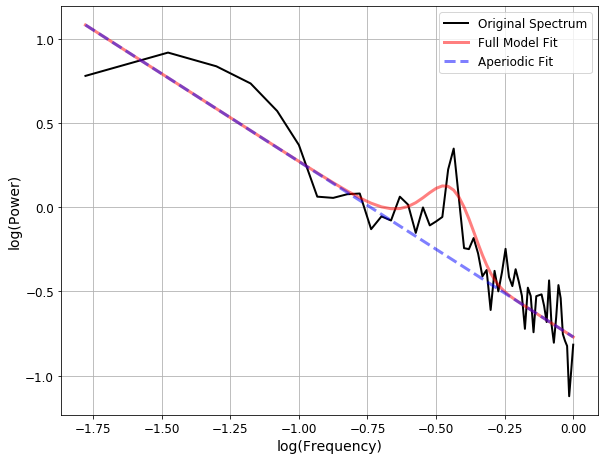

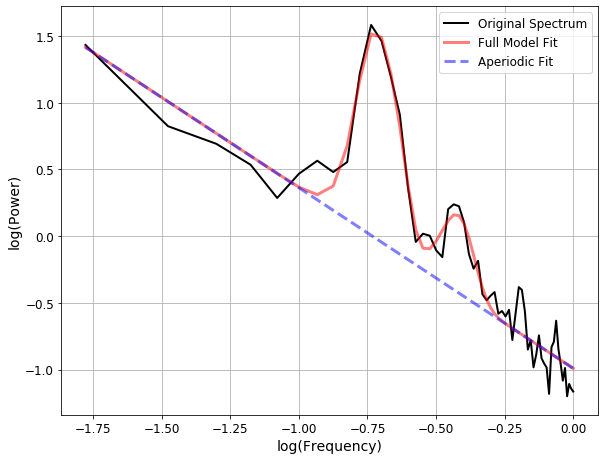

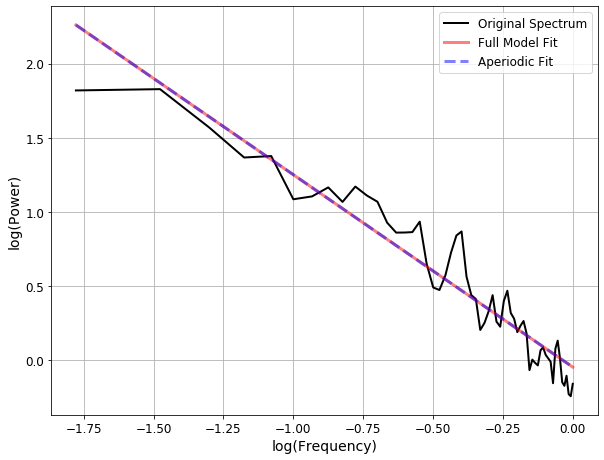

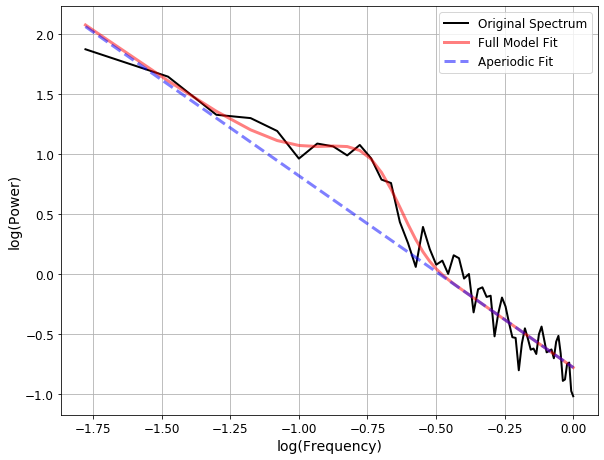

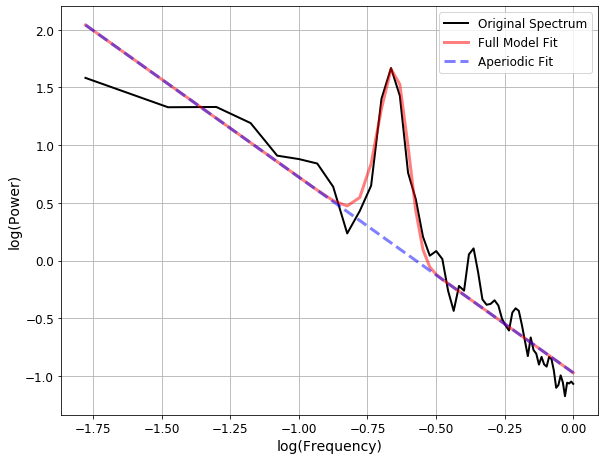

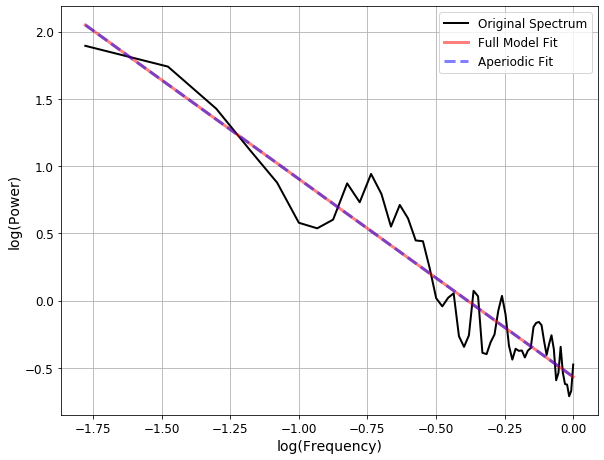

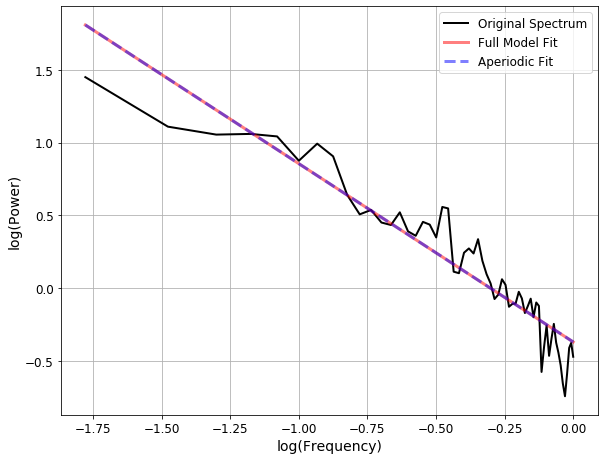

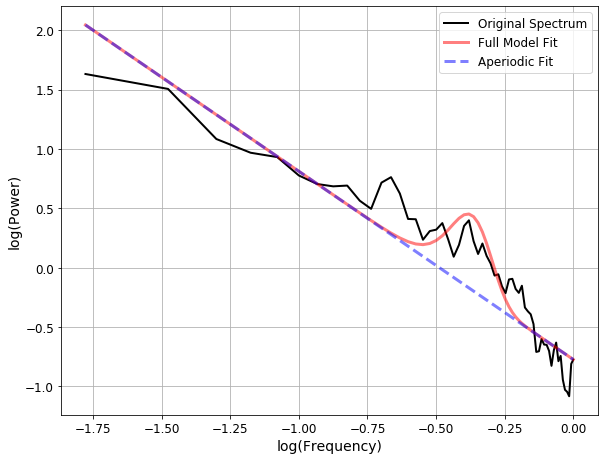

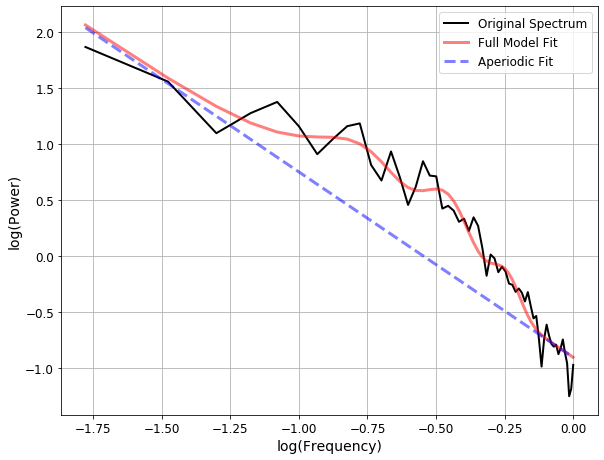

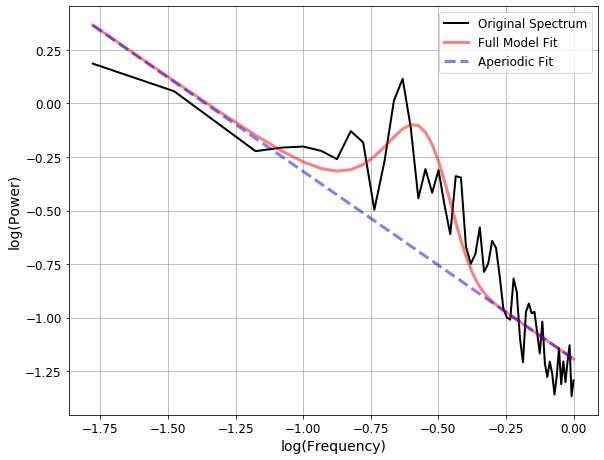

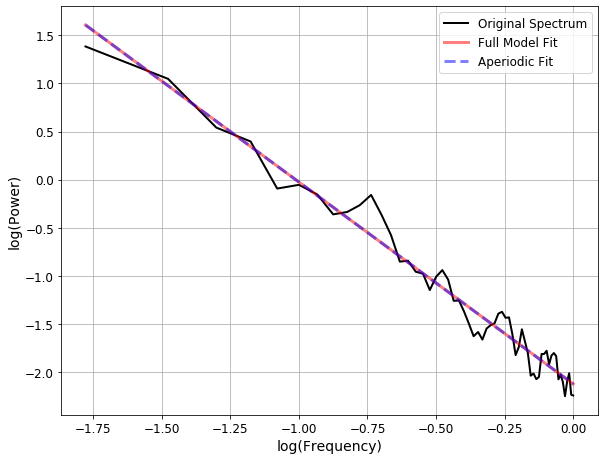

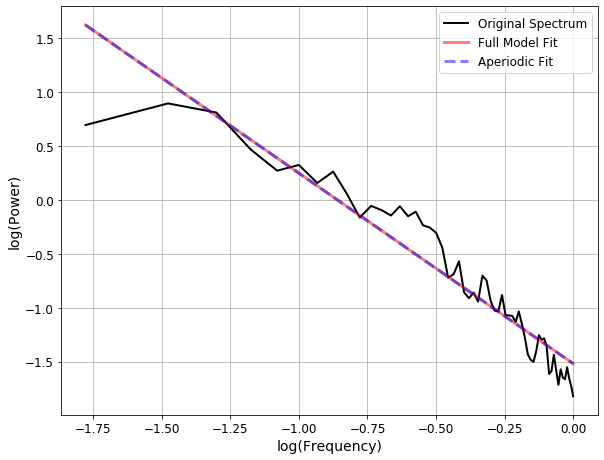

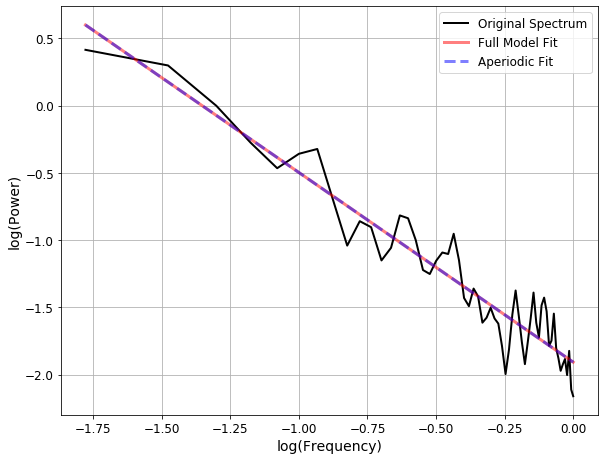

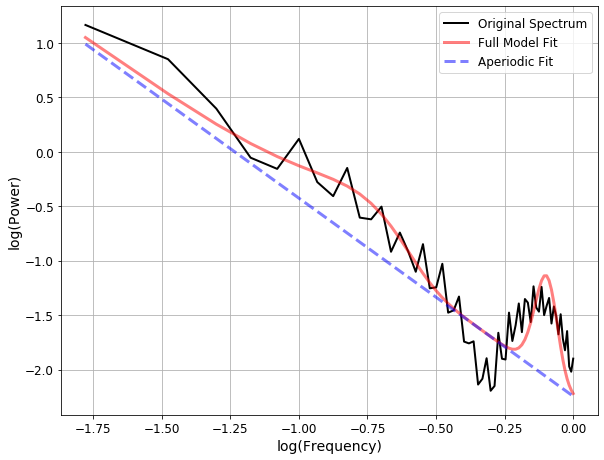

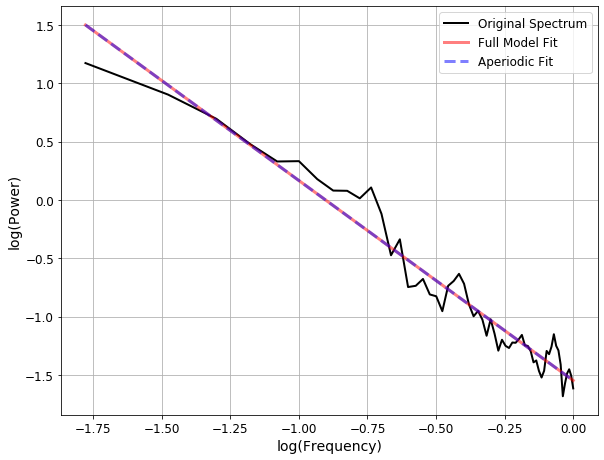

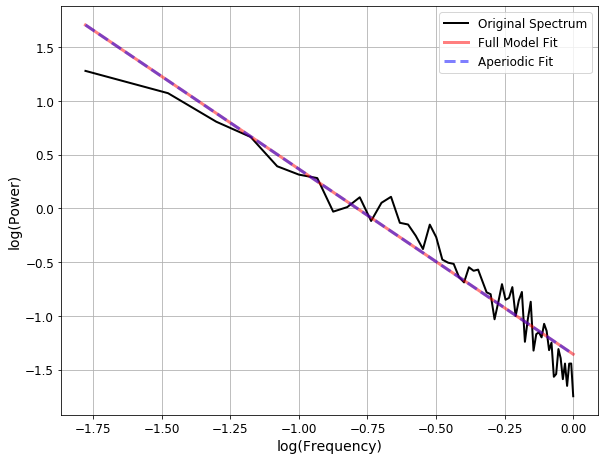

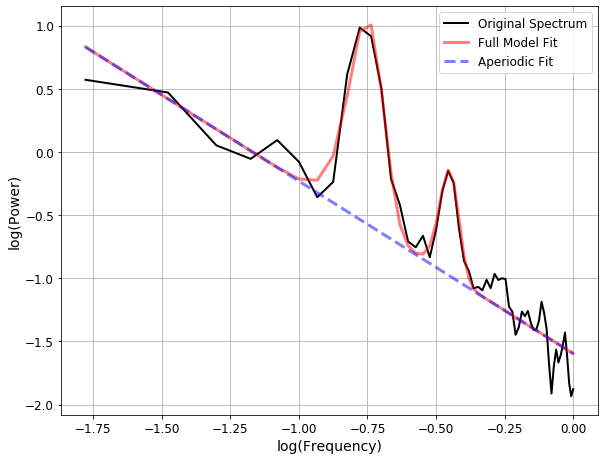

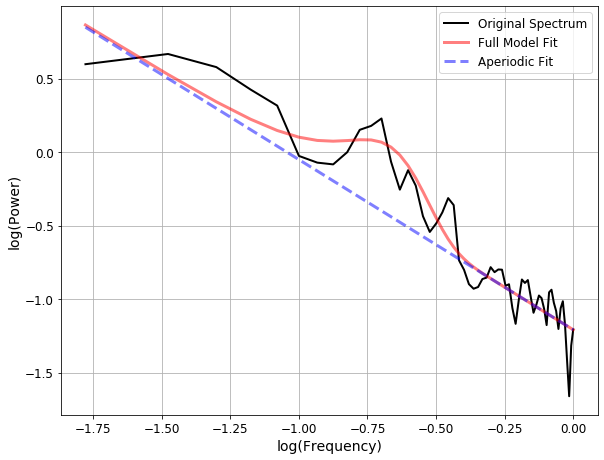

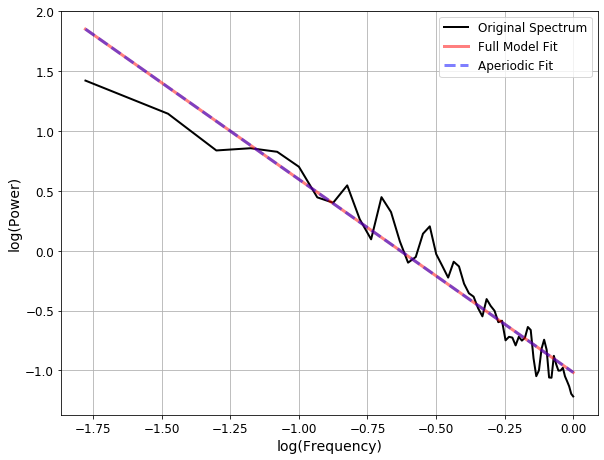

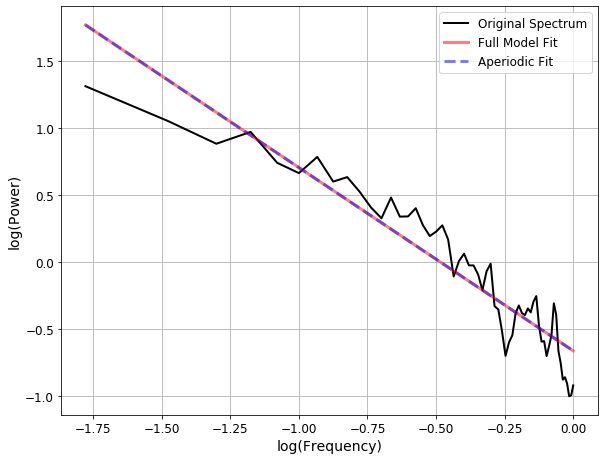

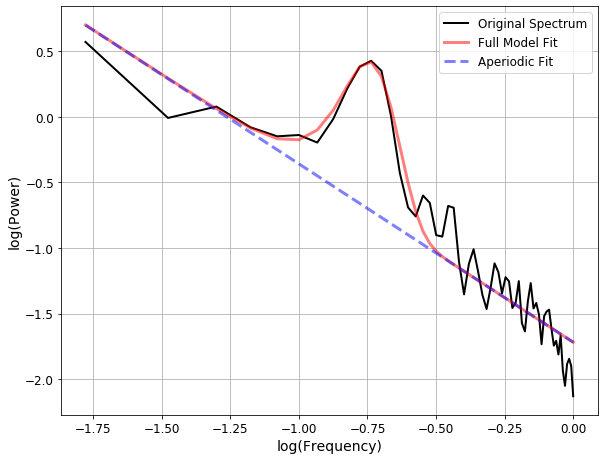

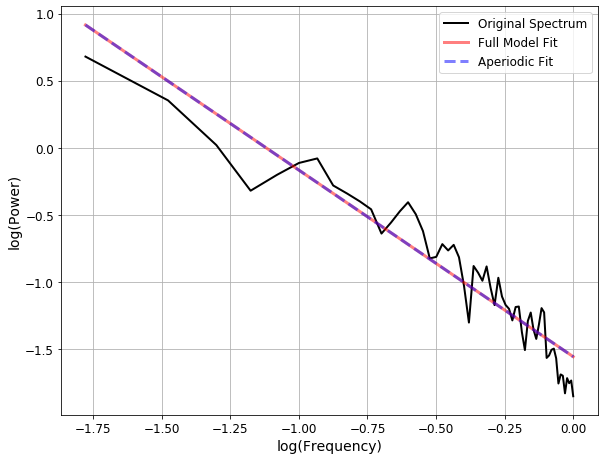

In [61]:
params=[]
avg = PowerSpectra.groupby(['group', 'session', 'subject']).mean()
for i in avg.index:
    print(i)
    t = avg.loc[i].reset_index()
    t.columns = ['freqs', 'power']
    bandpassed = t.loc[(t.freqs > (freq_range[0]-0.0001))&(t.freqs < (freq_range[1]+0.0001))]
    freqs = bandpassed.freqs.astype(float).values
    spectrum = bandpassed.power.values
    fm = SpectralModel(aperiodic_mode = aperiodic_mode, peak_width_limits = peak_width_limits, 
                       min_peak_height = min_peak_height, max_n_peaks=max_n_peaks)
    fm.report(freqs, spectrum, freq_range, plt_log=True)
    
    if fm.peak_params_.shape[0] == 1:
        peak1 = fm.peak_params_[0]
        peak2 = [np.nan, np.nan, np.nan]
        peak3 = [np.nan, np.nan, np.nan]
    
    elif fm.peak_params_.shape[0] > 1:
        sort_offsets = np.argsort(fm.peak_params_[:, 1])
        peak1 = fm.peak_params_[sort_offsets[-1]]
        peak2 = fm.peak_params_[sort_offsets[-2]]
        try:
            peak3 = fm.peak_params_[sort_offsets[-3]]
        except IndexError:
            peak3 = [np.nan, np.nan, np.nan]
            
    else:
        peak1 = [np.nan, np.nan, np.nan]
        peak2 = [np.nan, np.nan, np.nan]
        peak3 = [np.nan, np.nan, np.nan]


    parameter = {
        'group': i[0],
        'session': i[1],
        'subject': i[2],
        'aperiodic_offset': fm.aperiodic_params_[0],
        'aperiodic_knee': fm.aperiodic_params_[1],
        'aperiodic_exp': fm.aperiodic_params_[1],
        'n_peaks':fm.n_peaks_,
        'peak1_CF': peak1[0],
        'peak1_PW': peak1[1],
        'peak1_BW': peak1[2],
        'peak2_CF': peak2[0],
        'peak2_PW': peak2[1],
        'peak2_BW': peak2[2],
        'peak3_CF': peak3[0],
        'peak3_PW': peak3[1],
        'peak3_BW': peak3[2],
        'R2': fm.r_squared_,
        'error': fm.error_
    }
    params.append(parameter)
params = pd.DataFrame(params)

In [62]:
params.to_hdf(join(out_dir, 'Specparams_{}.hdf'.format(datetime.now().strftime("%Y-%m-%d"))), key='data')

with open(join(out_dir, 'description.txt'), "a") as myfile:
    myfile.write('''Specparams run {0}
                    freq_range = {1}
                    aperiodic_mode = {2}
                    peak_width_limits = {3}
                    min_peak_height = {4}
                    max_n_peaks={5} \n
                    '''.format(datetime.now().strftime("%Y-%m-%d"), freq_range, aperiodic_mode, peak_width_limits, min_peak_height, max_n_peaks))


In [76]:
print('PSP: {0} with at least 1 peak, {1} with no detected peak'.format(params.loc[(params.session == 'Baseline')&(~params.peak1_CF.isnull())].groupby('group').count().loc['PSP'].session,
                                                                       params.loc[(params.session == 'Baseline')&(params.peak1_CF.isnull())].groupby('group').count().loc['PSP'].session))

print('PD: {0} with at least 1 peak, {1} with no detected peak'.format(params.loc[(params.session == 'Baseline')&(~params.peak1_CF.isnull())].groupby('group').count().loc['PD'].session,
                                                                       params.loc[(params.session == 'Baseline')&(params.peak1_CF.isnull())].groupby('group').count().loc['PD'].session))

print('HC: {0} with at least 1 peak, {1} with no detected peak'.format(params.loc[(params.session == 'Baseline')&(~params.peak1_CF.isnull())].groupby('group').count().loc['Control'].session,
                                                                       params.loc[(params.session == 'Baseline')&(params.peak1_CF.isnull())].groupby('group').count().loc['Control'].session))


PSP: 13 with at least 1 peak, 7 with no detected peak
PD: 9 with at least 1 peak, 3 with no detected peak
HC: 7 with at least 1 peak, 5 with no detected peak


## Plot some results for orientation

In [66]:
data = params.loc[(params.session == 'Baseline')&(params.group.isin(['PD', 'PSP', 'Control']))]

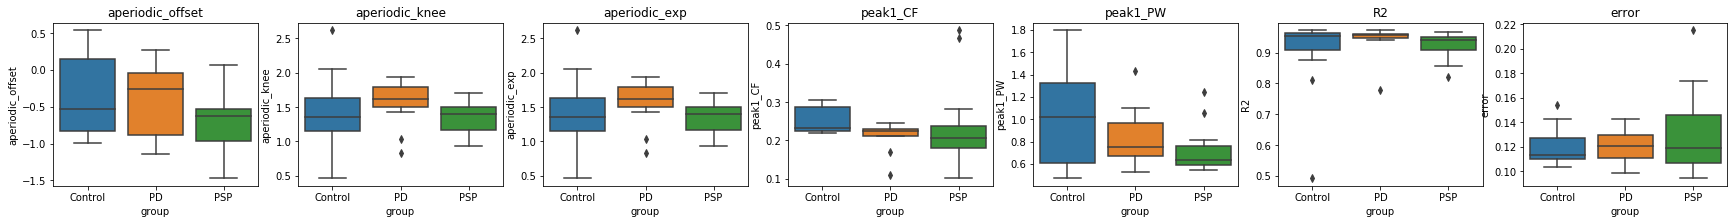

In [67]:
f, ax = plt.subplots(1, 7, figsize=(30, 3))
for i, title in enumerate(['aperiodic_offset', 'aperiodic_knee',
       'aperiodic_exp', 'peak1_CF', 'peak1_PW', 'R2', 'error']):
    sns.boxplot(data = data, x = 'group', y = title, ax=ax[i])
    ax[i].set(title = title)

In [68]:
data.loc[(data.n_peaks > 0)].groupby('group').mean()

aperiodic_offset  aperiodic_knee  aperiodic_exp   n_peaks  peak1_CF  \
group                                                                          
Control         -0.526024        1.411871       1.411871  1.142857  0.254893   
PD              -0.602937        1.659112       1.659112  1.333333  0.209305   
PSP             -0.741028        1.366333       1.366333  1.461538  0.237845   

         peak1_PW  peak1_BW  peak2_CF  peak2_PW  peak2_BW  peak3_CF  peak3_PW  \
group                                                                           
Control  1.021687  0.103272  0.360827  0.562204  0.150000       NaN       NaN   
PD       0.852027  0.087760  0.308656  0.958564  0.100509  0.369547  0.573893   
PSP      0.723045  0.108358  0.284699  0.853954  0.089834  0.383831  0.409064   

         peak3_BW        R2     error  
group                                  
Control       NaN  0.951842  0.113382  
PD       0.150000  0.959853  0.121283  
PSP      0.138783  0.926921  0.137155

[(0.01, 1)]

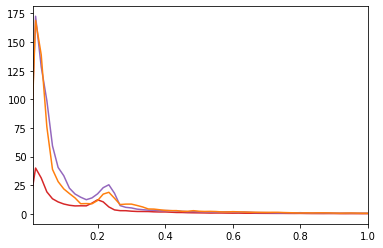

In [55]:
f, ax = plt.subplots()
plt.plot(PowerSpectra.groupby('group').mean().loc['PSP'].index, PowerSpectra.groupby('group').mean().loc['PSP'].values, color = baseline_color)
plt.plot(PowerSpectra.groupby('group').mean().loc['PD'].index, PowerSpectra.groupby('group').mean().loc['PD'].values, color = ips_color)
plt.plot(PowerSpectra.groupby('group').mean().loc['Control'].index, PowerSpectra.groupby('group').mean().loc['Control'].values, color = control_color)

ax.set(xlim=(0.01, 1))

## Single subject for control

                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.02 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.4830, 1.1386                                          
                                                                                                  
                                       2 peaks were found:                                        
          

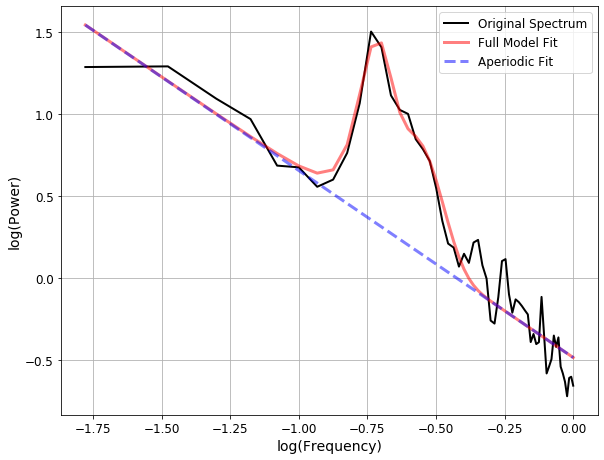

In [56]:
subject = '006'
group = 'PSP'
session = 'Baseline'

freq_range=[0.01, 1]

avg = PowerSpectra.groupby(['group', 'session', 'subject']).mean()
t = avg.loc[(group, session, subject)].reset_index()
t.columns = ['freqs', 'power']
bandpassed = t.loc[(t.freqs > (freq_range[0]-0.0001))&(t.freqs < (freq_range[1]+0.0001))]
freqs = bandpassed.freqs.astype(float).values
spectrum = bandpassed.power.values
fm = SpectralModel(aperiodic_mode = aperiodic_mode, peak_width_limits = peak_width_limits, 
                   min_peak_height = min_peak_height, max_n_peaks=max_n_peaks)
fm.report(freqs, spectrum, freq_range, plt_log=True)


[(0.01, 1)]

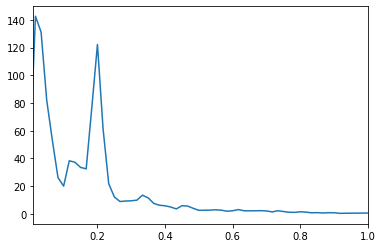

In [25]:
f, ax = plt.subplots()
plt.plot(t.freqs.values, t.power.values)
ax.set(xlim=(0.01, 1))

In [58]:
params.loc[params.subject == '006']

group   session subject  aperiodic_offset  aperiodic_knee  \
17  Control_Molly  Baseline     006         -0.492758        1.581078   
46            PSP  Baseline     006         -0.482977        1.138587   
65            PSP  Followup     006         -0.989984        1.352865   

    aperiodic_exp  n_peaks  peak1_CF  peak1_PW  peak1_BW  peak2_CF  peak2_PW  \
17       1.581078        0       NaN       NaN       NaN       NaN       NaN   
46       1.138587        2  0.266357  0.692554  0.130657  0.189799  1.052574   
65       1.352865        3  0.381013  0.580873  0.105788  0.224799  1.305191   

    peak2_BW  peak3_CF  peak3_PW  peak3_BW        R2     error  
17       NaN       NaN       NaN       NaN  0.939874  0.130061  
46      0.05       NaN       NaN       NaN  0.953848  0.106718  
65      0.05  0.381013  0.580873  0.105788  0.966352  0.110819